In [2]:
import pickle

# import the scenario-properties-baseline.pkl file
with open('../../../scenario-properties-baseline.pkl', 'rb') as f:
    data = pickle.load(f)

In [6]:
data.x0

S   Su     N
alt_bin                 
0           9    3     7
1          47   21    30
2         222   42   110
3         452  114   202
4        5605  257   256
5        1106  165   424
6         105  171   606
7          81  136  1195
8         123  238  1830
9          18   96  1627
10         44   99   832
11         53  189   620
12         43   53   379
13         13   17   274
14        701   25   147
15          0    9   260
16        132   20   141
17          0  368   166
18         31  240   265
19          0   26   202

In [9]:
data.full_coll

Matrix([
[     -3.72899809427148e-13*pi*N_1*S_1 - 2.62498604780722e-17*pi*S_1**2 - 1.31249302390361e-12*pi*S_1*Su_1,      -3.72899809427148e-8*pi*N_1*Su_1 - 1.31249302390361e-12*pi*S_1*Su_1 - 2.62498604780722e-7*pi*Su_1**2,            1.48873019030176e-9*pi*N_1**2 + 1.98084378767701e-10*pi*N_1*S_1 + 5.91791997560883e-6*pi*N_1*Su_1 + 1.1736968866258e-14*pi*S_1**2 + 8.00161372022835e-10*pi*S_1*Su_1 + 3.5102625924302e-5*pi*Su_1**2],
[     -3.65129192763543e-13*pi*N_2*S_2 - 2.57028567036226e-17*pi*S_2**2 - 1.28514283518113e-12*pi*S_2*Su_2,      -3.65129192763543e-8*pi*N_2*Su_2 - 1.28514283518113e-12*pi*S_2*Su_2 - 2.57028567036226e-7*pi*Su_2**2,          1.45770750986075e-9*pi*N_2**2 + 1.93956627195994e-10*pi*N_2*S_2 + 5.79460028915743e-6*pi*N_2*Su_2 + 1.14923898036072e-14*pi*S_2**2 + 7.83487329468175e-10*pi*S_2*Su_2 + 3.43711451269193e-5*pi*Su_2**2],
[      -3.57598958882562e-13*pi*N_3*S_3 - 2.5172774403375e-17*pi*S_3**2 - 1.25863872016875e-12*pi*S_3*Su_3,       -3.57598958882562e-8*pi*N_3

In [50]:
data.indicator_variables_list[1][1].name

fringe_satellite_items = [
    item for sublist in data.indicator_variables_list for item in sublist 
    if item.name.startswith("Su")
]

print(fringe_satellite_items[0])

In [22]:
import sympy as sp

data.indicator_variables_list[1][1].eqs

test = [sp.lambdify(data.all_symbolic_vars, eq, 'numpy') for eq in data.indicator_variables_list[1][1].eqs]

x0 = data.x0.T.values.flatten()

In [33]:
substitution_dict

{S_1: 9,
 S_2: 47,
 S_3: 222,
 S_4: 452,
 S_5: 5605,
 S_6: 1106,
 S_7: 105,
 S_8: 81,
 S_9: 123,
 S_10: 18,
 S_11: 44,
 S_12: 53,
 S_13: 43,
 S_14: 13,
 S_15: 701,
 S_16: 0,
 S_17: 132,
 S_18: 0,
 S_19: 31,
 S_20: 0,
 Su_1: 3,
 Su_2: 21,
 Su_3: 42,
 Su_4: 114,
 Su_5: 257,
 Su_6: 165,
 Su_7: 171,
 Su_8: 136,
 Su_9: 238,
 Su_10: 96,
 Su_11: 99,
 Su_12: 189,
 Su_13: 53,
 Su_14: 17,
 Su_15: 25,
 Su_16: 9,
 Su_17: 20,
 Su_18: 368,
 Su_19: 240,
 Su_20: 26,
 N_1: 7,
 N_2: 30,
 N_3: 110,
 N_4: 202,
 N_5: 256,
 N_6: 424,
 N_7: 606,
 N_8: 1195,
 N_9: 1830,
 N_10: 1627,
 N_11: 832,
 N_12: 620,
 N_13: 379,
 N_14: 274,
 N_15: 147,
 N_16: 260,
 N_17: 141,
 N_18: 166,
 N_19: 265,
 N_20: 202}

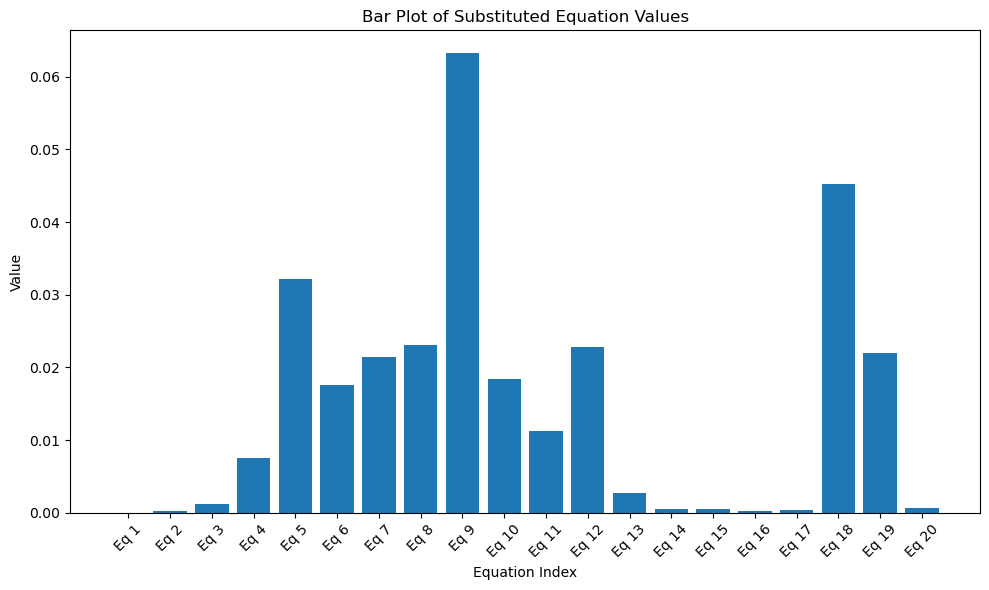

In [37]:
test = data.indicator_variables_list[1][1].eqs

substitution_dict = {var: val for var, val in zip(data.all_symbolic_vars, x0)}

# Substitute the values into each equation in `test`
equations = [eq.subs(substitution_dict) for eq in test]

# The result is a list of equations with substituted values
# craete a bar plot of equations

import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))
plt.bar(range(len(equations)), equations, tick_label=[f"Eq {i+1}" for i in range(len(equations))])
plt.xlabel("Equation Index")
plt.ylabel("Value")
plt.title("Bar Plot of Substituted Equation Values")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

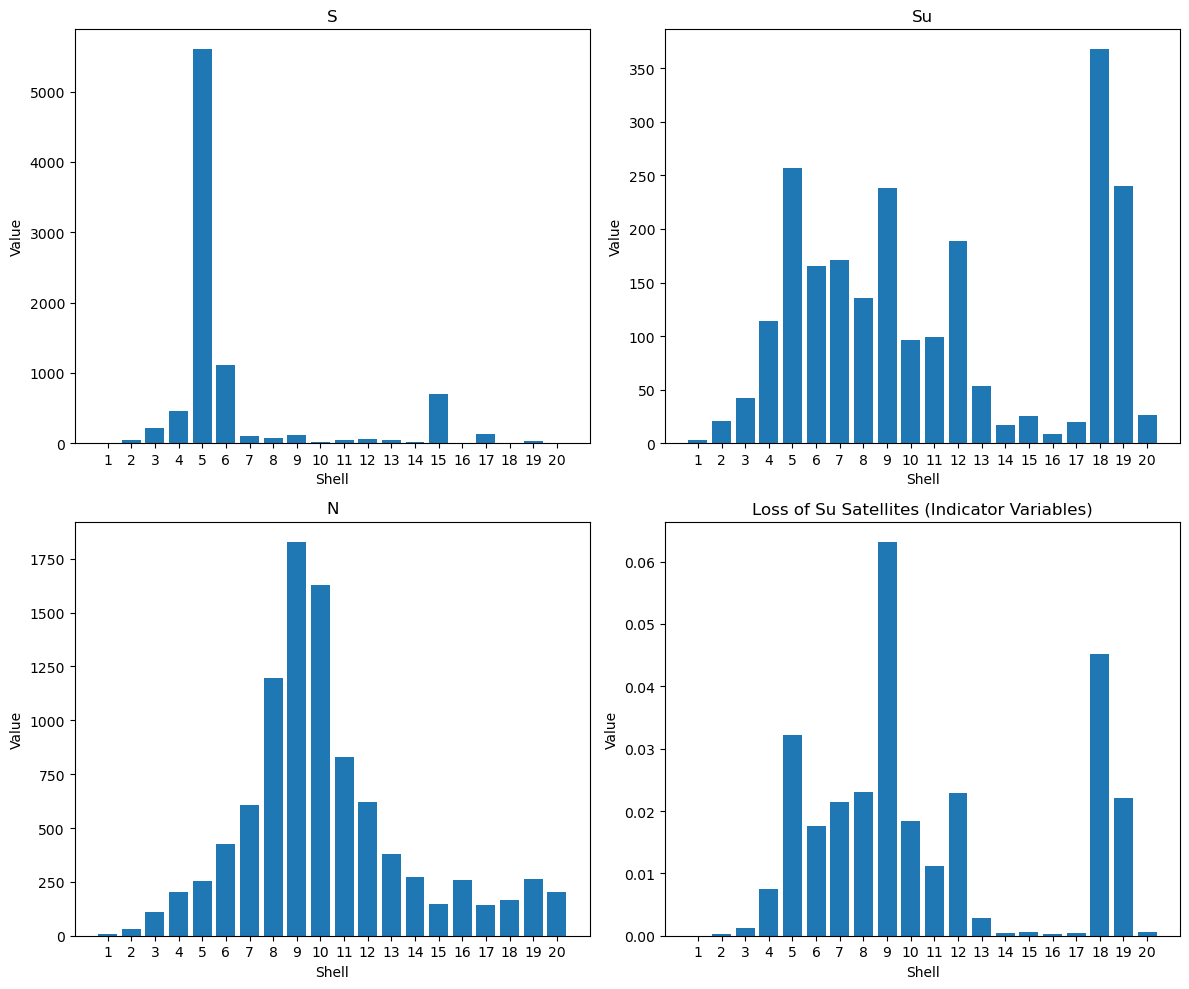

In [46]:
# Create a 2x2 grid plot
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot S
axes[0, 0].bar(range(1, 21), S)
axes[0, 0].set_title("S")
axes[0, 0].set_xlabel("Shell")
axes[0, 0].set_ylabel("Value")
axes[0, 0].set_xticks(range(1, 21))

# Plot Su
axes[0, 1].bar(range(1, 21), Su)
axes[0, 1].set_title("Su")
axes[0, 1].set_xlabel("Shell")
axes[0, 1].set_ylabel("Value")
axes[0, 1].set_xticks(range(1, 21))

# Plot N
axes[1, 0].bar(range(1, 21), N)
axes[1, 0].set_title("N")
axes[1, 0].set_xlabel("Shell")
axes[1, 0].set_ylabel("Value")
axes[1, 0].set_xticks(range(1, 21))

# Plot the equations output
axes[1, 1].bar(range(1, 21), equations)
axes[1, 1].set_title("Loss of Su Satellites (Indicator Variables)")
axes[1, 1].set_xlabel("Shell")
axes[1, 1].set_ylabel("Value")
axes[1, 1].set_xticks(range(1, 21))

# Adjust layout
plt.tight_layout()
plt.show()


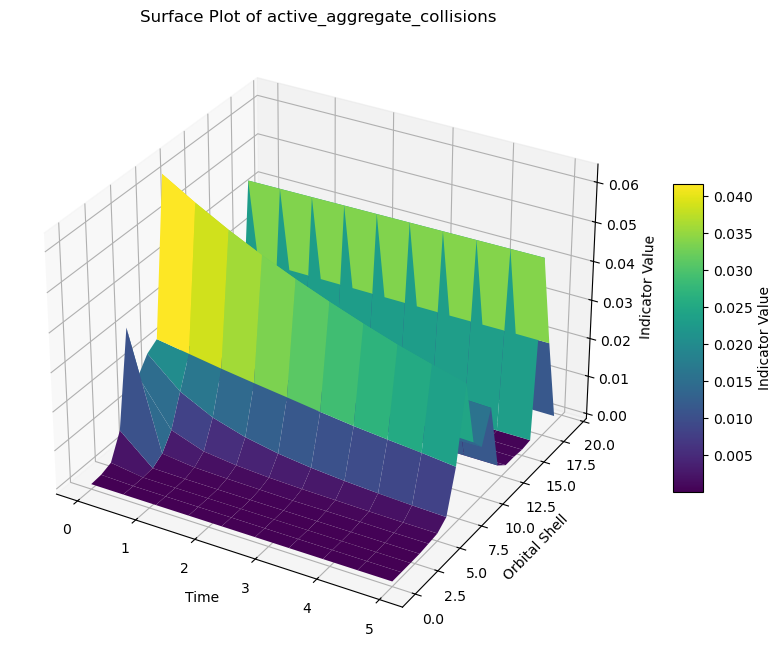

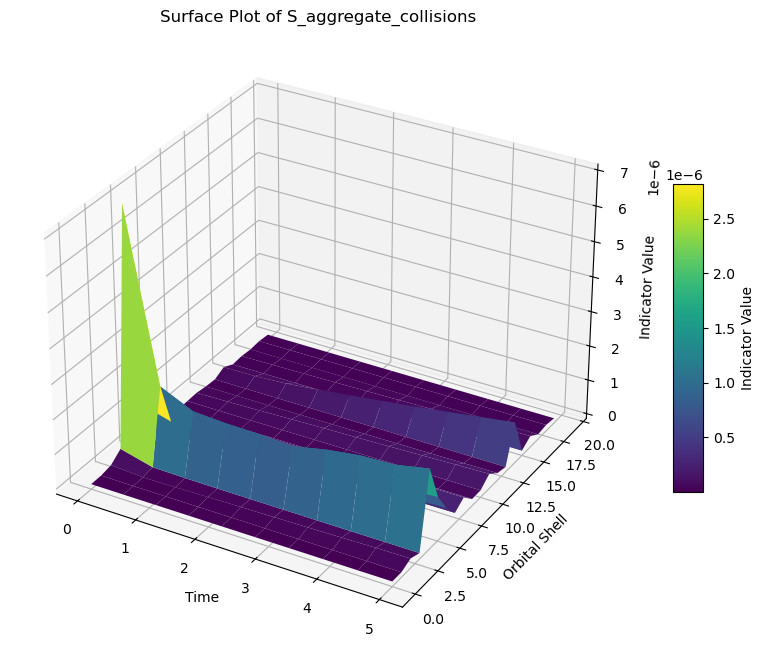

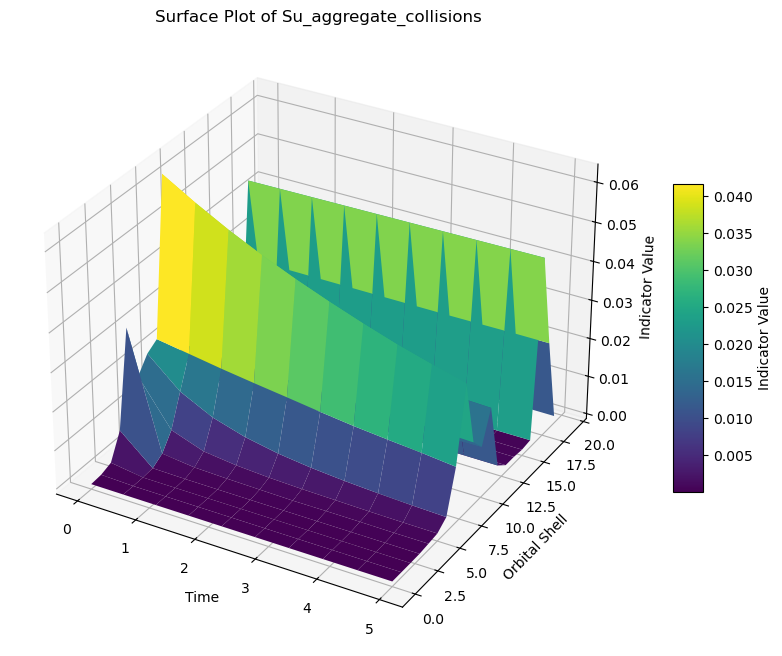

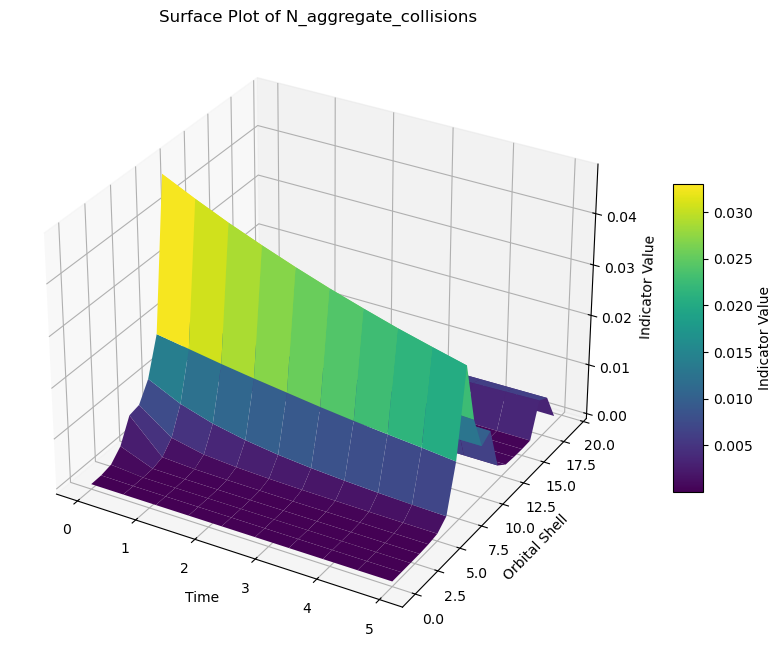

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Loop through all indicators in the dataset
for indicator_name, time_values in data.indicator_results['indicators'].items():
    # Extract time and indicator values
    times = np.array(list(time_values.keys()))  # Time array
    indicator_matrix = np.array([np.squeeze(values) for values in time_values.values()])  # Shape: [num_times, num_shells]

    # Orbital shells (assume consistent number of shells from the matrix)
    num_shells = indicator_matrix.shape[1]
    orbital_shells = np.arange(num_shells)

    # Transpose the indicator matrix to align with the meshgrid
    Z = indicator_matrix.T  # Shape: [num_shells, num_times]

    # Create a meshgrid for the surface plot
    X, Y = np.meshgrid(times, orbital_shells)

    # Create the plot
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Plot the surface
    surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')

    # Add labels and title
    ax.set_xlabel('Time')
    ax.set_ylabel('Orbital Shell')
    ax.set_zlabel('Indicator Value')
    ax.set_title(f'Surface Plot of {indicator_name}')
    fig.colorbar(surf, shrink=0.5, aspect=10, label='Indicator Value')

    # Show the plot
    plt.show()

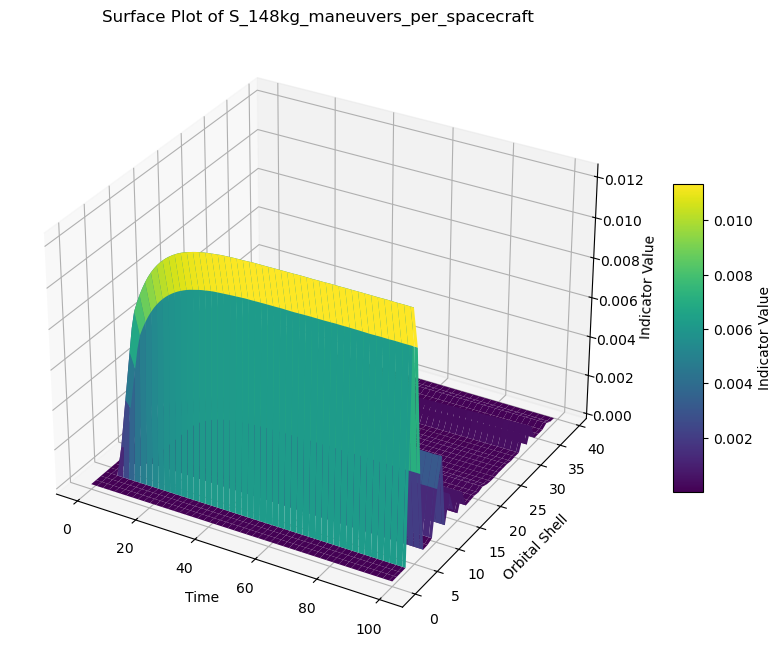

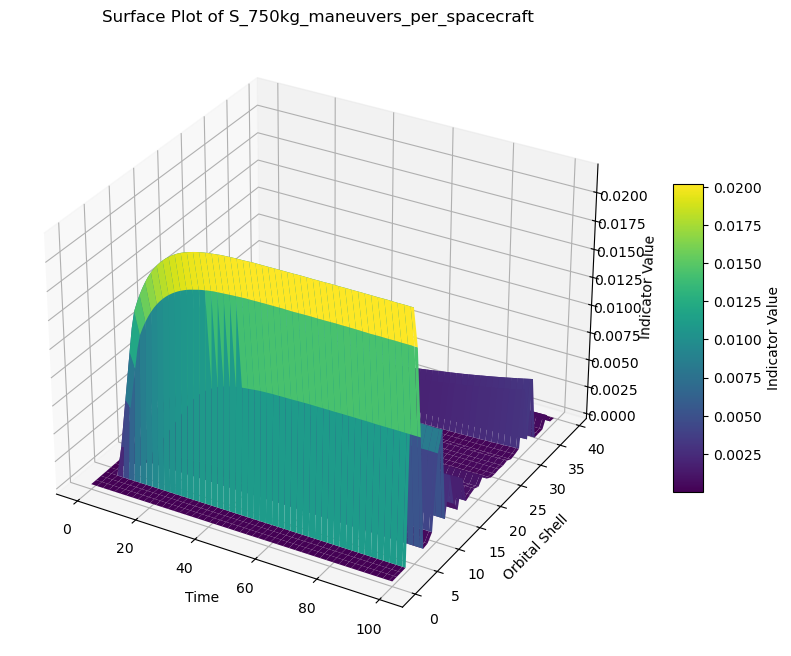

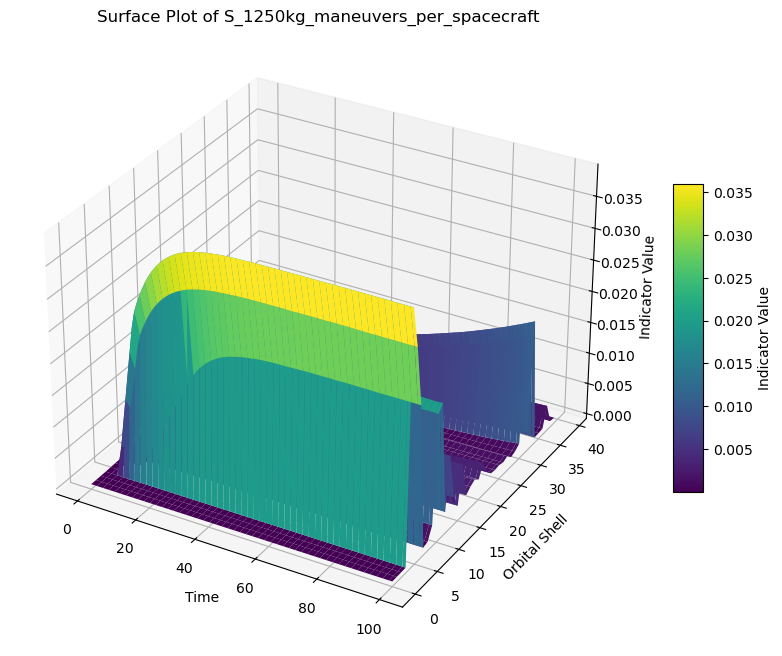

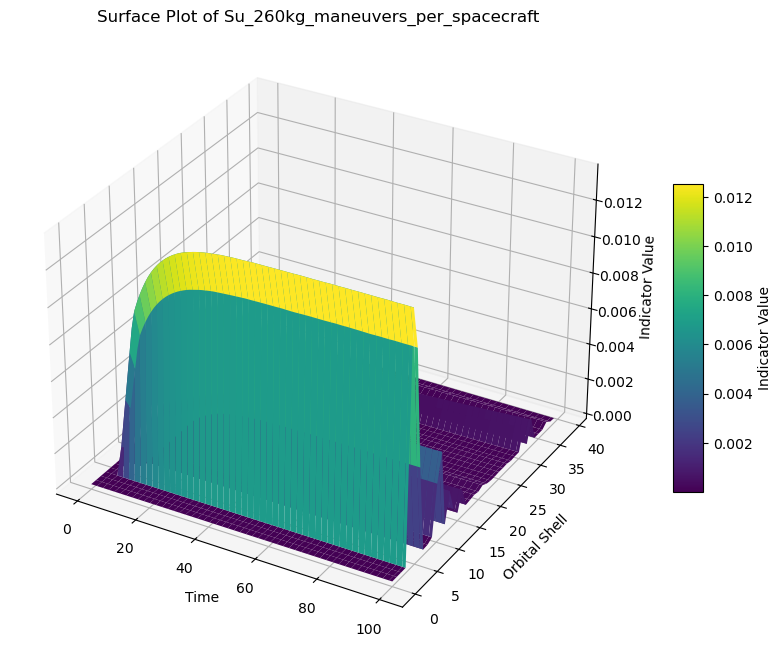

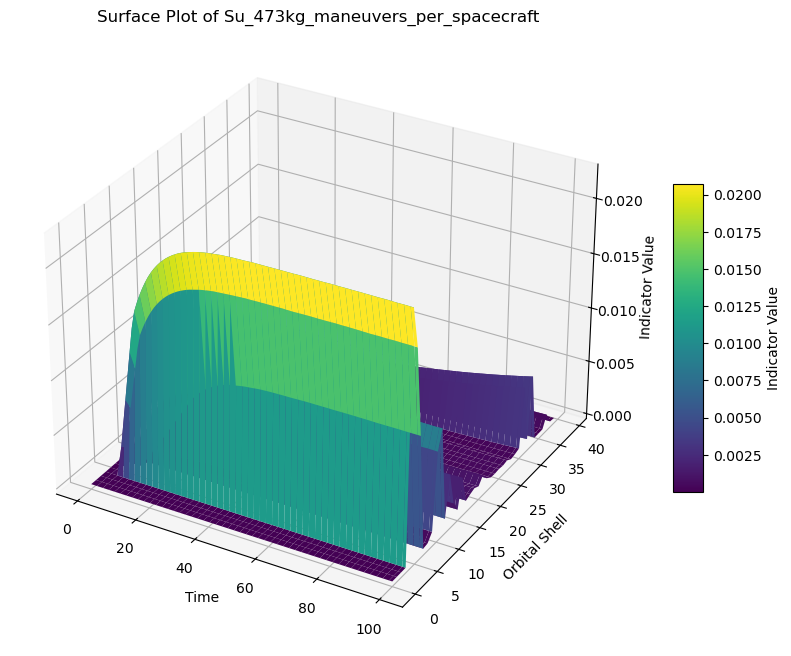

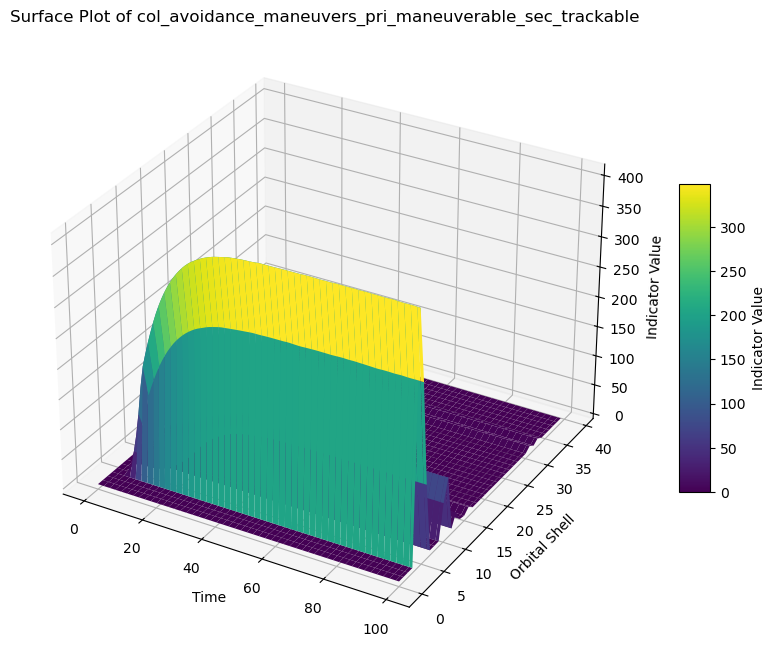

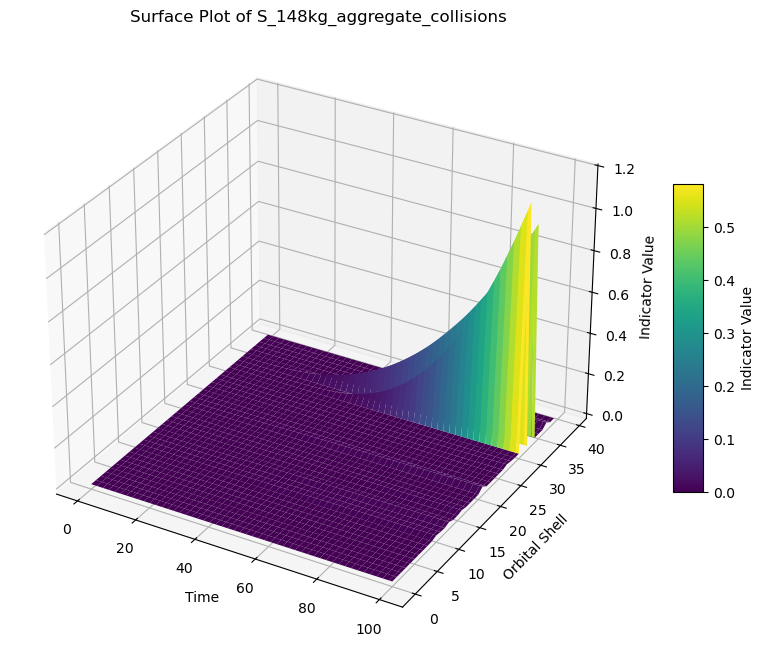

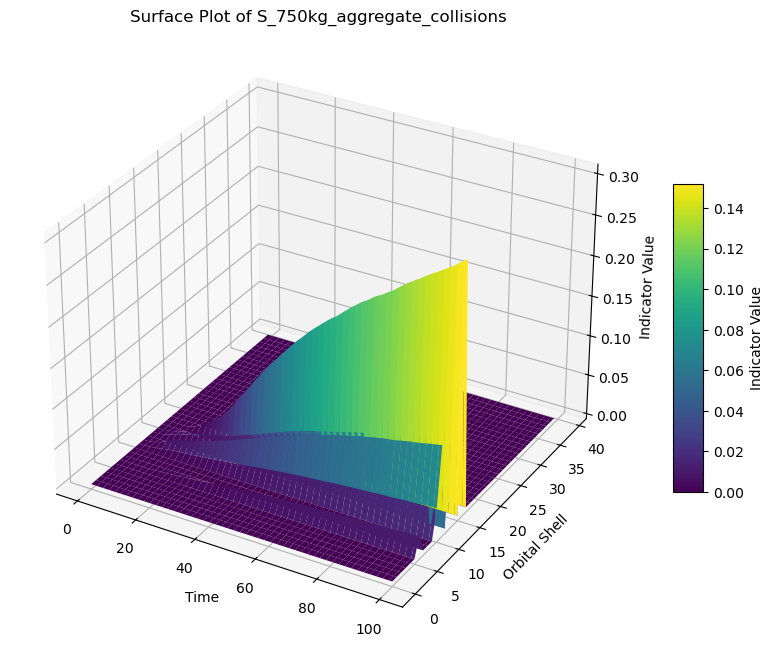

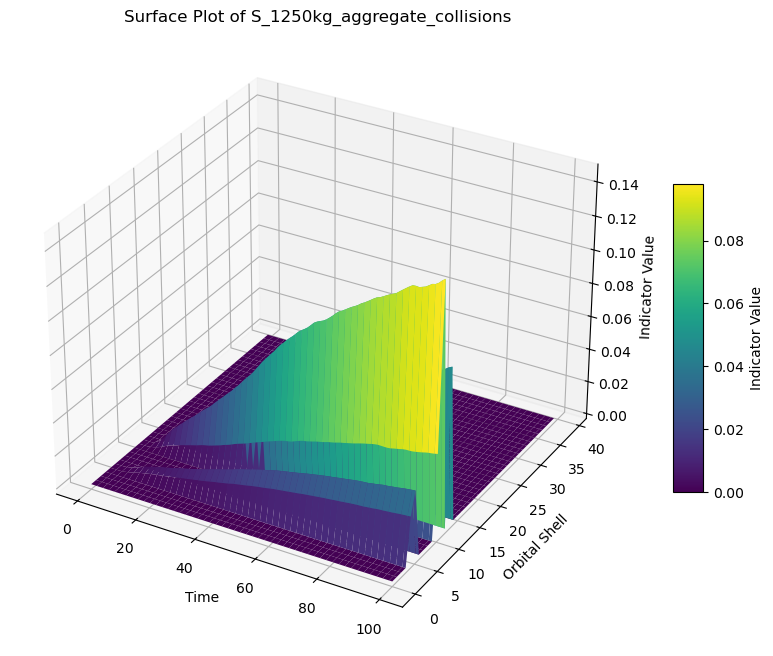

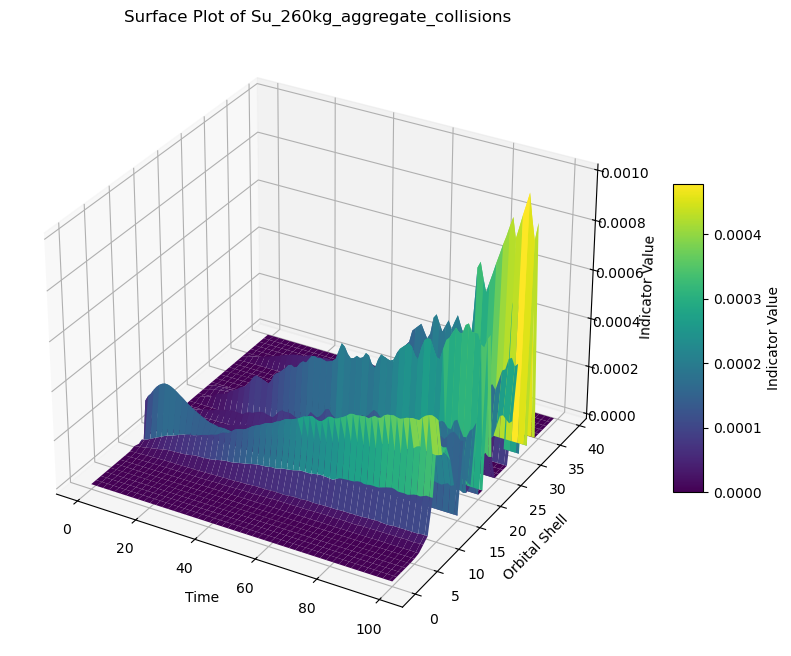

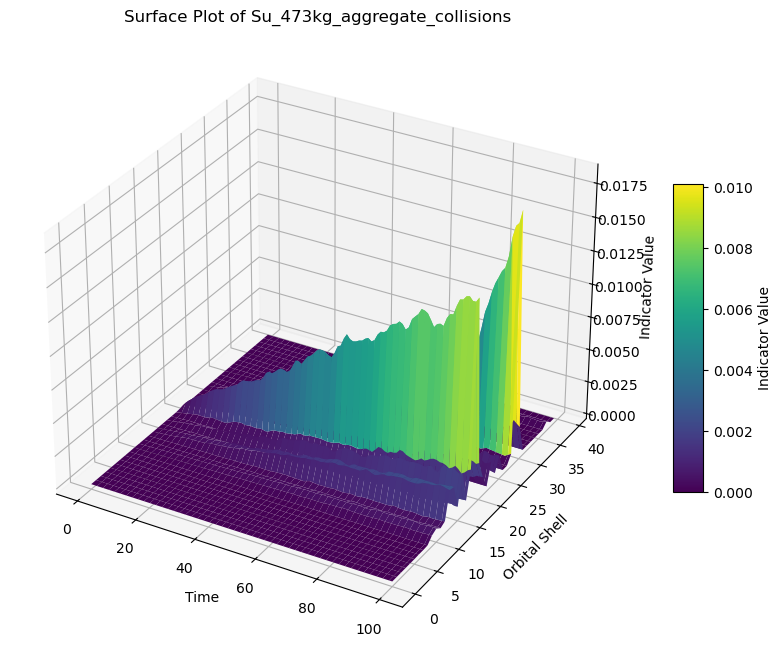

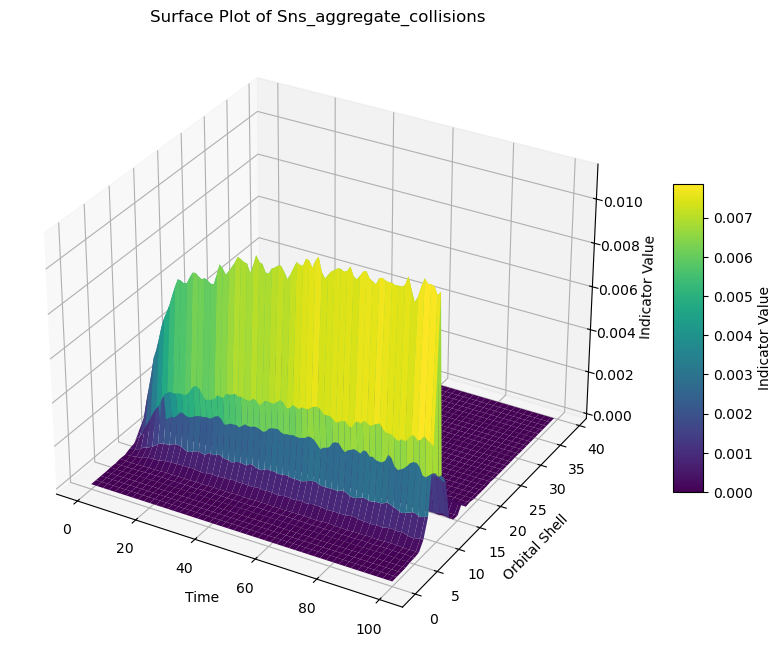

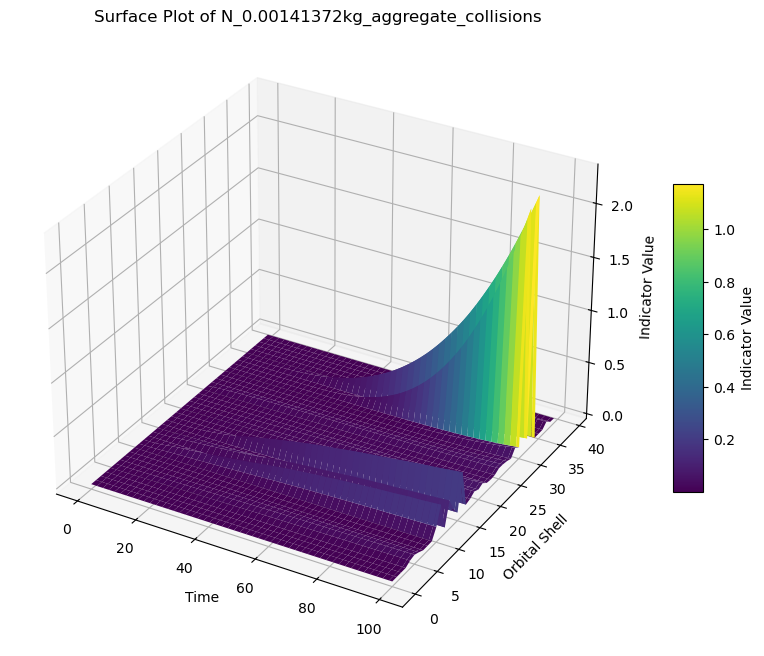

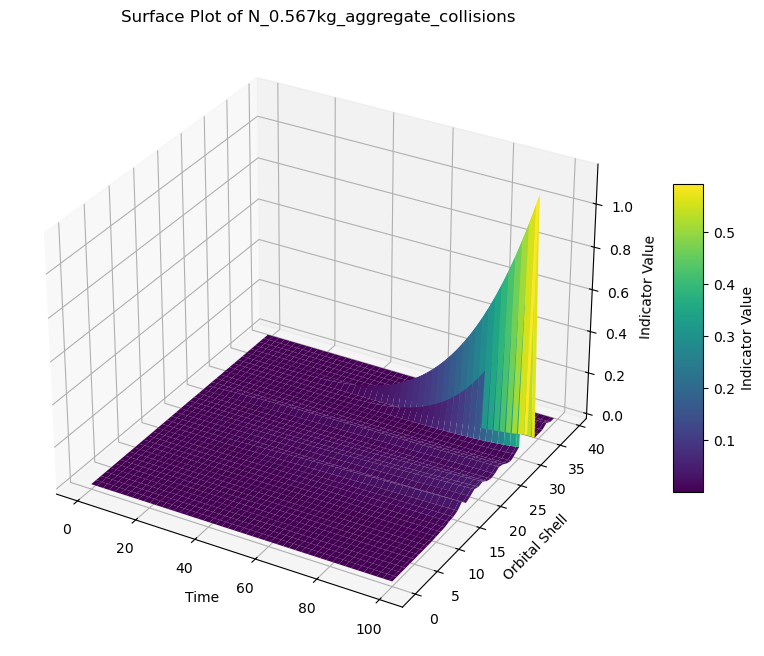

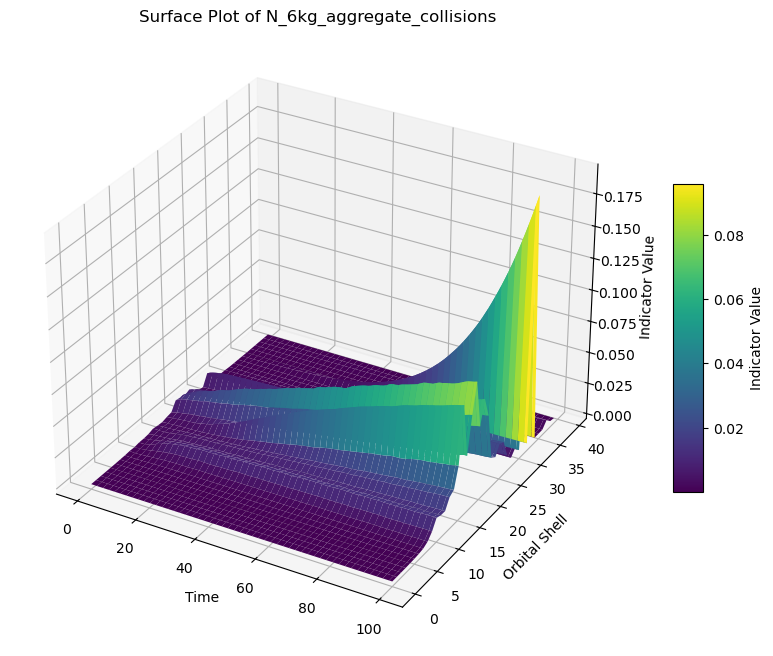

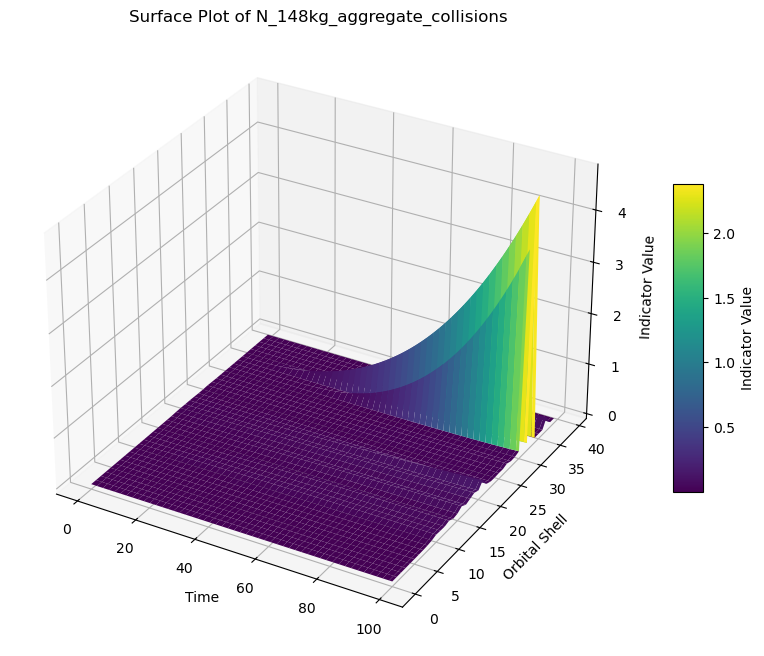

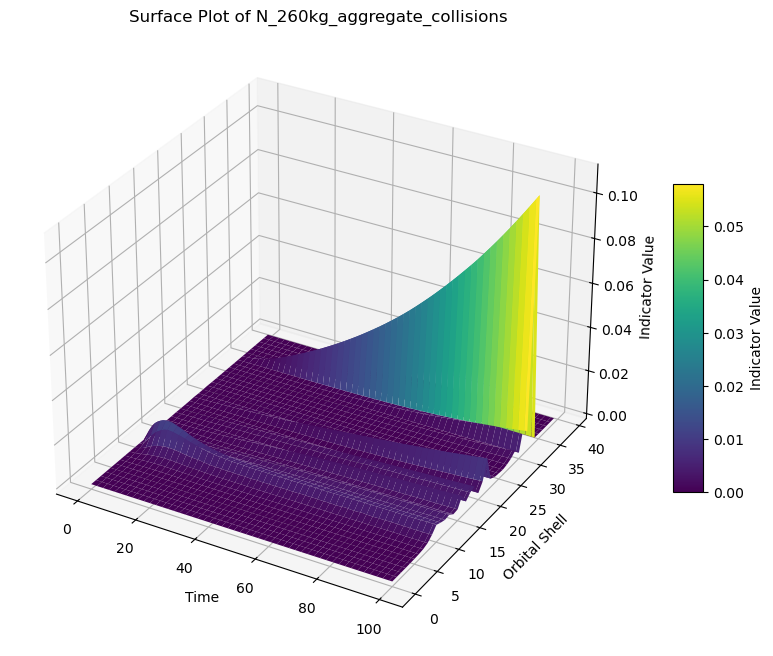

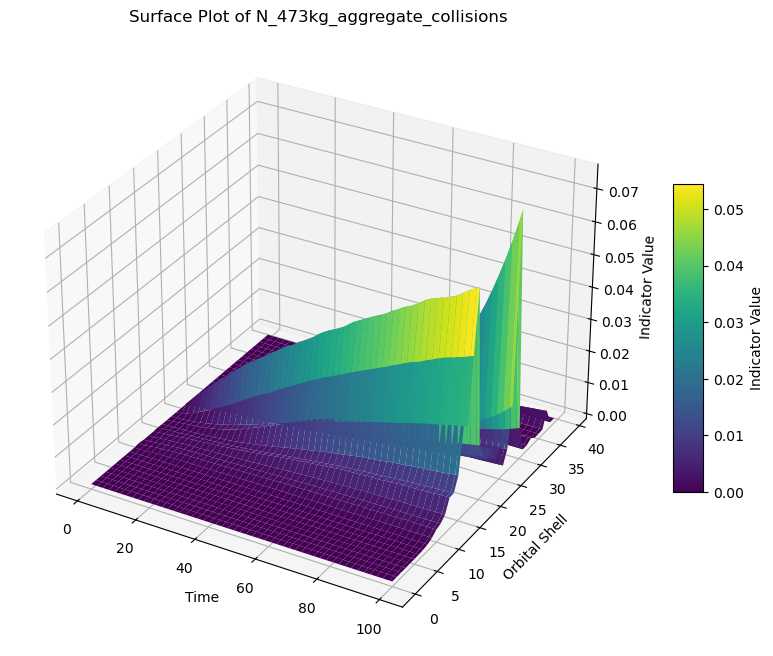

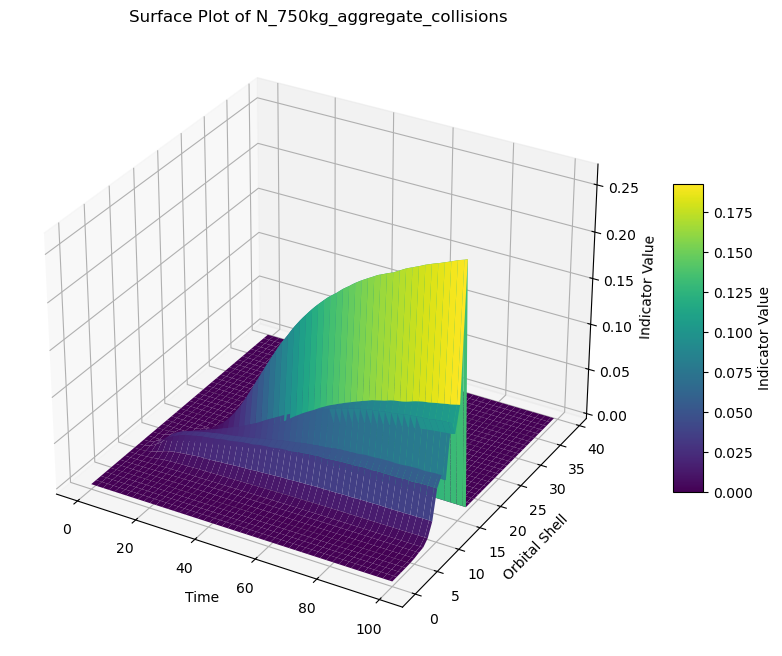

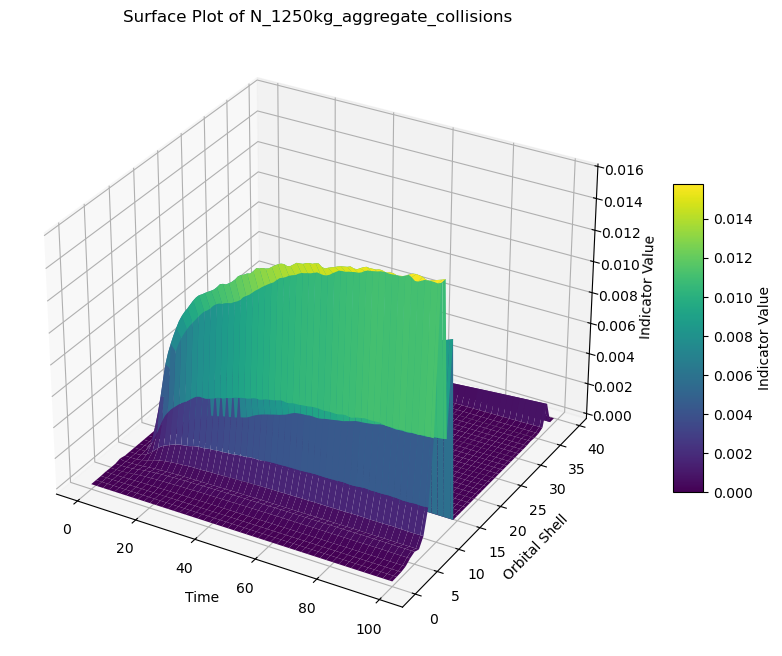

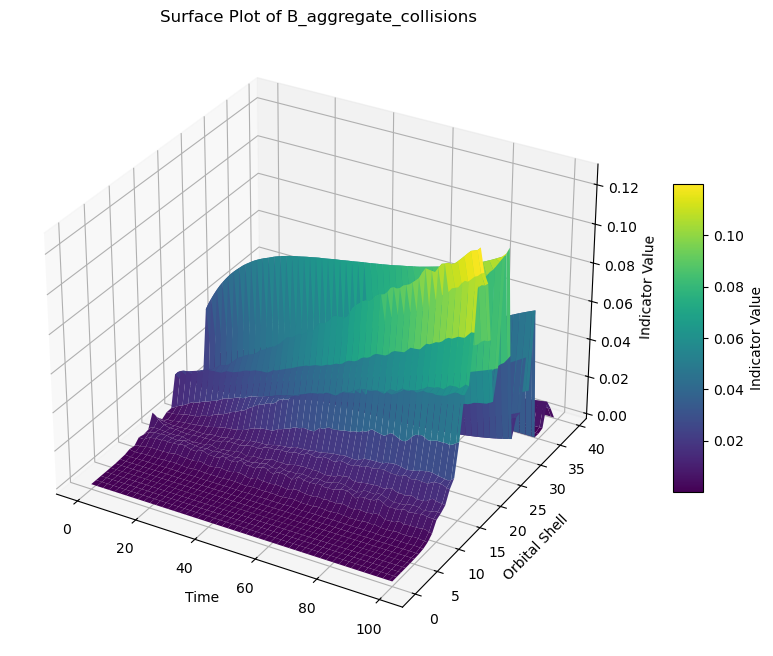

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Loop through all indicators in the dataset
for indicator_name, time_values in data.indicator_results['indicators'].items():
    # Extract time and indicator values
    times = np.array(list(time_values.keys()))  # Time array
    indicator_matrix = np.array([np.squeeze(values) for values in time_values.values()])  # Shape: [num_times, num_shells]

    # Orbital shells (assume consistent number of shells from the matrix)
    num_shells = indicator_matrix.shape[1]
    orbital_shells = np.arange(num_shells)

    # Transpose the indicator matrix to align with the meshgrid
    Z = indicator_matrix.T  # Shape: [num_shells, num_times]

    # Create a meshgrid for the surface plot
    X, Y = np.meshgrid(times, orbital_shells)

    # Create the plot
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Plot the surface
    surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')

    # Add labels and title
    ax.set_xlabel('Time')
    ax.set_ylabel('Orbital Shell')
    ax.set_zlabel('Indicator Value')
    ax.set_title(f'Surface Plot of {indicator_name}')
    fig.colorbar(surf, shrink=0.5, aspect=10, label='Indicator Value')

    # Show the plot
    plt.show()